# Practice Lab: Linear Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [7]:
# load the dataset
x_train, y_train = load_data()
print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101

In [8]:
# print y_train
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are: [17.592   9.1302 13.662  11.854   6.8233]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

In [9]:
# check the dimensions of the variables
print("The shape of x_train is:", x_train.shape)
print("The shape of y_train is:", y_train.shape)
print("Number of training examples (m)", len(x_train))

The shape of x_train is: (97,)
The shape of y_train is: (97,)
Number of training examples (m) 97


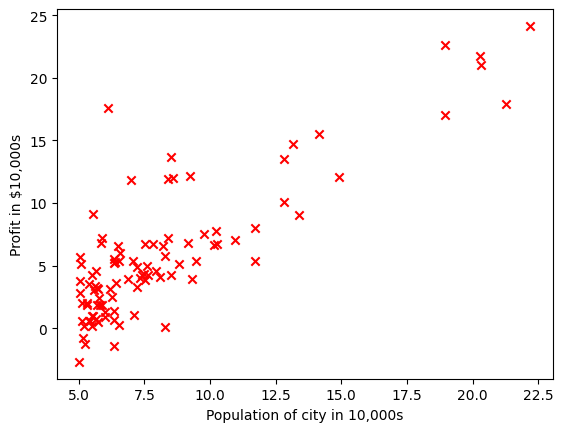

In [10]:
# visualize the data
plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlabel('Profit vs. Population per city')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.show()

Our goal is to build a linear regression model to fit this data.
- With this model, we can then input a new city's population, and have the model estimate our restaurant's potential monthly profits for that city.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [12]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    return total_cost

In [13]:
# compute cost
in_w = 2
in_b = 1

cost = compute_cost(x_train, y_train, in_w, in_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [26]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_db_i = (f_wb - y[i])
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [27]:
# compute and display gradient
in_w = 0
in_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, in_w, in_b)
print("Gradient at initial w, b (zeros):", tmp_dj_db, tmp_dj_dw)

# Public tests
compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -5.83913505154639 -65.32884974555672
Using X with shape (4, 1)
All tests passed!


In [28]:
test_w = 0.2
test_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print("Gradient at test w, b:", tmp_dj_db, tmp_dj_dw)

Gradient at test w, b: -4.007175051546391 -47.41610118114435



### Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [30]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_hist = []
    w_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            cost = cost_function(x, y, w, b)
            J_hist.append(cost)

        if i%math.ceil(num_iters/10) == 0:
            w_hist.append(w)
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}")

    return w, b, J_hist, w_hist


In [31]:
in_w = 0
in_b = 0

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train, y_train, in_w, in_b, compute_cost, compute_gradient, alpha, iterations)

print("w, b found by gradient descent:", w, b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w, b found by gradient descent: 1.166362350335582 -3.63029143940436


In [34]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

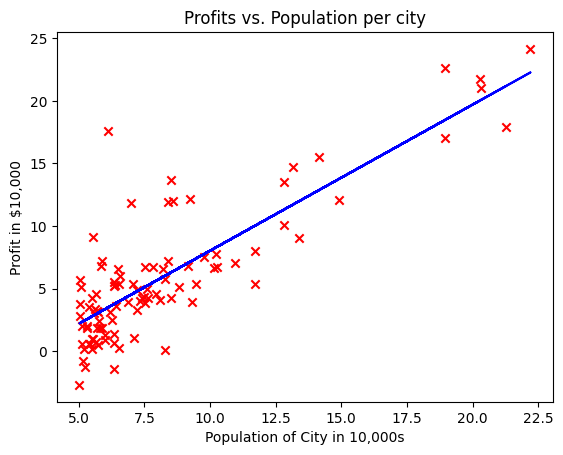

In [36]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")

In [37]:
predict1 = 3.5 * w + b
print("For population = 35,000, we predict a profit of $%.2f" % (predict1*10000))

predict1 = 7* w + b
print("For population = 70,000, we predict a profit of $%.2f" % (predict1*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
